### Unsupervised Learning: Principal Component Analysis 

- Dataset: Iris dataset
- Learning Date: 1-Sep-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbinsCluster.csv')
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
58,Splish Splash,70,0.5,0.0,16,12,0.5,2
55,Rocky Road,250,14.0,0.4,29,20,5.0,1
15,Chocolate Hazelnut Truffle,280,17.0,0.4,29,20,5.0,1
29,Love Potion #31,260,14.0,0.4,29,24,4.0,1
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,2
26,Green Tea,140,9.0,0.3,13,10,3.0,0
48,Praline ‘n Cream,270,14.0,0.4,32,26,4.0,1
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0
31,Made with Snickers,170,9.0,0.3,21,16,3.0,0
32,Mango Mania,130,6.0,0.2,17,14,2.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   cluster            70 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 4.5+ KB


In [4]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster'],
      dtype='object')

In [5]:
cols = ['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
cols

['Flavour',
 'Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

array([[<AxesSubplot: title={'center': 'Calories'}>,
        <AxesSubplot: title={'center': 'Total Fat (g)'}>,
        <AxesSubplot: title={'center': 'Trans Fat (g)'}>,
        <AxesSubplot: title={'center': 'Carbohydrates (g)'}>,
        <AxesSubplot: title={'center': 'Sugars (g)'}>,
        <AxesSubplot: title={'center': 'Protein (g)'}>, <AxesSubplot: >]],
      dtype=object)

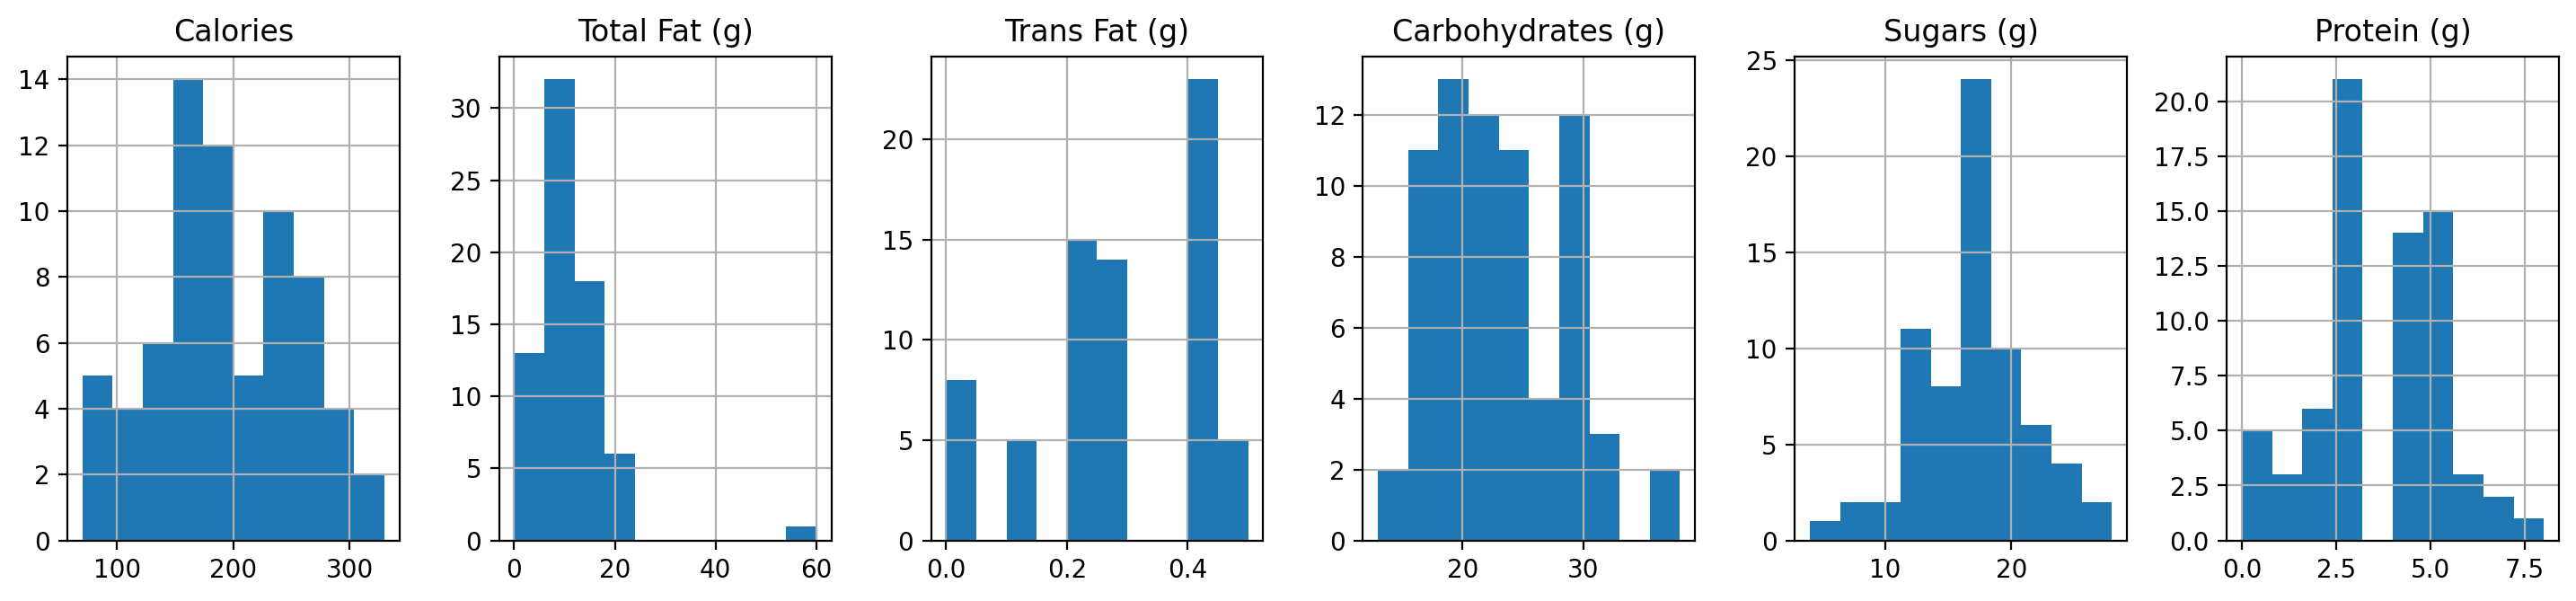

In [6]:
df[cols].hist(layout = (1, len(cols)), figsize = (3 * len(cols), 3.5))

In [7]:
dcorr = df[cols].corr()
dcorr

/var/folders/0z/2gy2pkss67v3rwygb64_tfvm0000gn/T/ipykernel_17479/1183537547.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dcorr = df[cols].corr()


,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
Calories,1.000000,0.712023,0.843900,0.602181,0.575605,0.822287
Total Fat (g),0.712023,1.000000,0.649645,0.244462,0.249821,0.595305
Trans Fat (g),0.843900,0.649645,1.000000,0.327513,0.406342,0.693241
Carbohydrates (g),0.602181,0.244462,0.327513,1.000000,0.635768,0.437426
Sugars (g),0.575605,0.249821,0.406342,0.635768,1.000000,0.285580
Protein (g),0.822287,0.595305,0.693241,0.437426,0.285580,1.000000


In [8]:
mask = np.zeros_like(dcorr)
mask.shape

(6, 6)

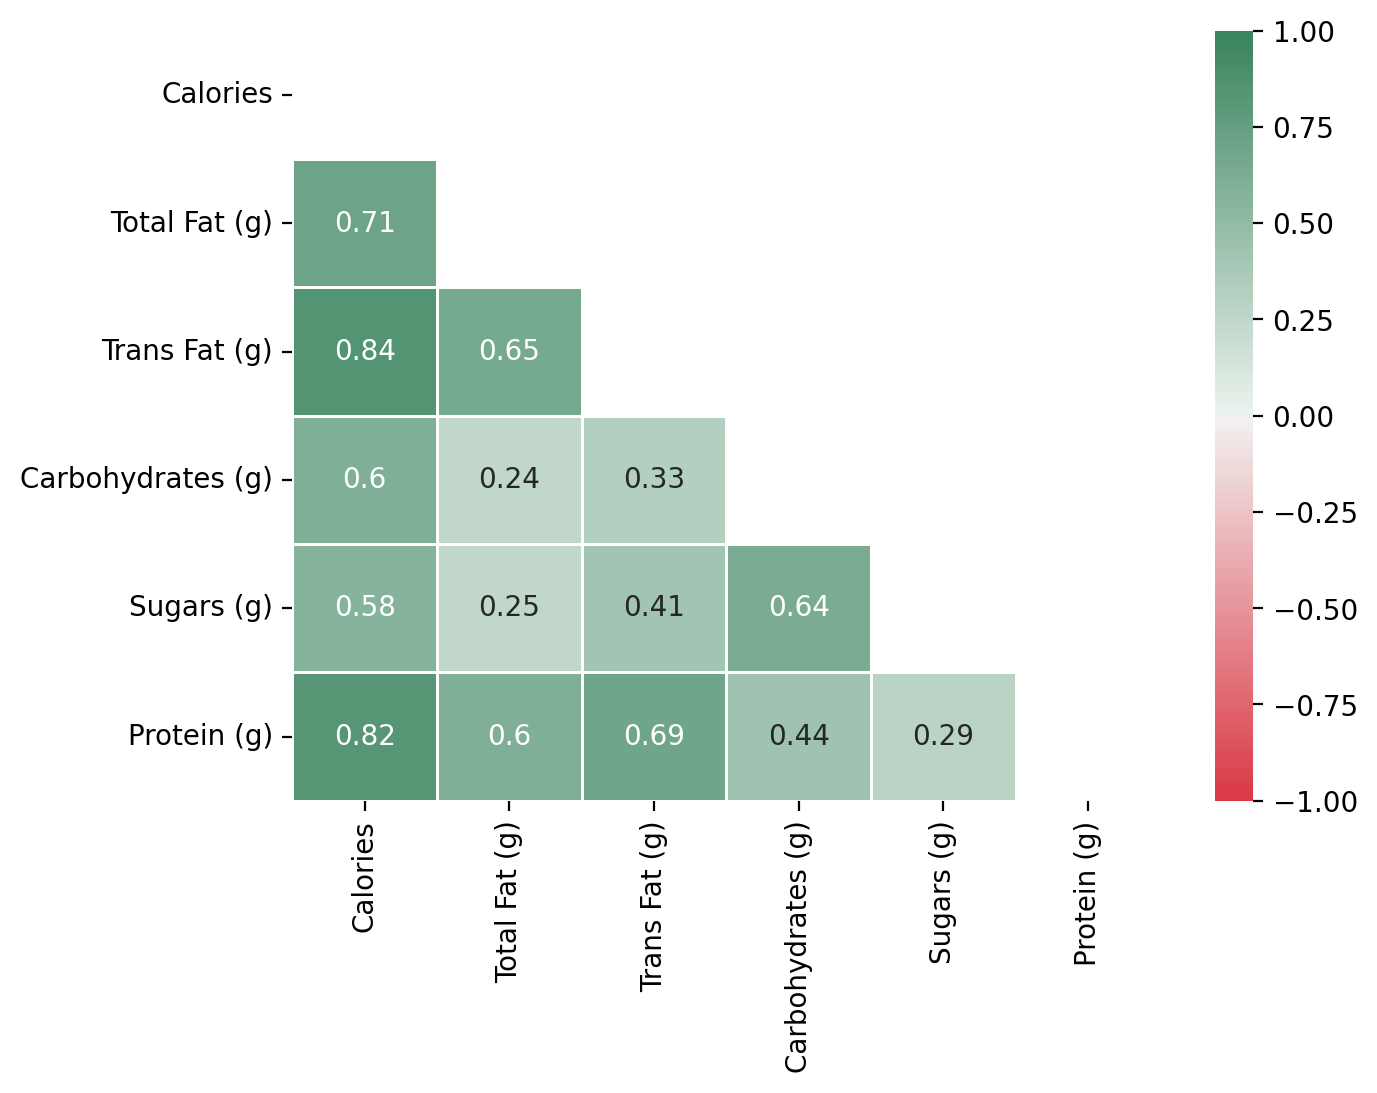

In [9]:
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (7,5)) 
sns.heatmap(dcorr, cmap = sns.diverging_palette(10, 145, n = 100), 
            vmin = -1, vmax = 1, center = 0, linewidths = 1, annot = True, mask = mask, ax = ax);